# Proyek Analisis Data: Nama dataset
- Nama: Dian Rizqi Saputra
- Email: dianrizqisaputra@gmail.com
- Id Dicoding: dianrizqisaputra

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh kondisi lingkungan terhadap penggunaan bike sharing?
2. Bagaimana pengaruh cuaca terhadap penggunaan bike sharing?
3. Bagai mana pengaruh hari kerja terhadap penggunaan bike sahring?

## Menyaipkan semua library yang dibuthkan

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Data Wrangling

### Gathering Data

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Belajar Analisis Data dengan Python/Bike-sharing-dataset'): #membuka file
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/Belajar Analisis Data dengan Python/Bike-sharing-dataset/hour.csv
/content/drive/MyDrive/Colab Notebooks/Belajar Analisis Data dengan Python/Bike-sharing-dataset/day.csv
/content/drive/MyDrive/Colab Notebooks/Belajar Analisis Data dengan Python/Bike-sharing-dataset/Readme.txt


In [10]:
hour_bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Belajar Analisis Data dengan Python/Bike-sharing-dataset/hour.csv")
hour_bike.head()

day_bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Belajar Analisis Data dengan Python/Bike-sharing-dataset/hour.csv")
day_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [11]:
hour_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
day_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [13]:
hour_bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
hour_bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
hour_bike.drop_duplicates(inplace=True)
hour_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [16]:
day_bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
day_bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [18]:
day_bike.drop_duplicates(inplace=True)
day_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
hour_bike.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12588,12589,2012-06-13,2,1,6,17,0,3,1,1,0.72,0.6515,0.32,0.4925,75,782,857
413,414,2011-01-19,1,0,1,6,0,3,1,2,0.22,0.2576,0.93,0.0896,0,32,32
10854,10855,2012-04-02,2,1,4,10,0,1,1,1,0.40,0.4091,0.50,0.5224,85,119,204
15083,15084,2012-09-25,4,1,9,16,0,2,1,1,0.66,0.6212,0.39,0.2985,59,436,495
16309,16310,2012-11-17,4,1,11,7,0,6,0,1,0.24,0.2273,0.70,0.1940,8,70,78


In [20]:
hour_bike.hr.value_counts().sort_index()

0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hr, dtype: int64

In [21]:
hour_bike.loc[hour_bike["weathersit"] == 1, "weathersit"] = "Clear"
hour_bike.loc[hour_bike["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
hour_bike.loc[hour_bike["weathersit"] == 3, "weathersit"] = "Light Snow"
hour_bike.loc[hour_bike["weathersit"] == 4, "weathersit"] = "Heavy Rain"

hour_bike.weathersit.value_counts().sort_index()

Clear            11413
Heavy Rain           3
Light Snow        1419
Mist + Cloudy     4544
Name: weathersit, dtype: int64

In [22]:
hour_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,Mist + Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,Mist + Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [23]:
day_bike.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3470,3471,2011-05-29,2,0,5,12,0,0,0,2,0.70,0.6667,0.74,0.2239,216,186,402
2858,2859,2011-05-04,2,0,5,0,0,3,1,3,0.52,0.5000,0.77,0.1642,5,22,27
8821,8822,2012-01-08,1,1,1,9,0,0,0,1,0.32,0.3333,0.53,0.1343,23,102,125
9683,9684,2012-02-13,1,1,2,10,0,1,1,1,0.14,0.1515,0.50,0.1343,1,70,71
2247,2248,2011-04-08,2,0,4,12,0,5,1,3,0.38,0.3939,0.66,0.2239,29,51,80


In [24]:
day_bike.loc[day_bike["season"] == 1, "season"] = "Springer"
day_bike.loc[day_bike["season"] == 2, "season"] = "Summer"
day_bike.loc[day_bike["season"] == 3, "season"] = "Fall"
day_bike.loc[day_bike["season"] == 4, "season"] = "Winter"

day_bike.season.value_counts().sort_index()

Fall        4496
Springer    4242
Summer      4409
Winter      4232
Name: season, dtype: int64

In [25]:
day_bike.loc[day_bike["yr"] == 0, "yr"] = "2011"
day_bike.loc[day_bike["yr"] == 1, "yr"] = "2012"

day_bike.yr.value_counts().sort_index()

2011    8645
2012    8734
Name: yr, dtype: int64

In [26]:
day_bike.mnth.value_counts().sort_index()

1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
Name: mnth, dtype: int64

In [27]:
day_bike.loc[day_bike["holiday"] == 0, "holiday"] = "Holiday"
day_bike.loc[day_bike["holiday"] == 1, "holiday"] = "Not a Holiday"

day_bike.holiday.value_counts().sort_index()

Holiday          16879
Not a Holiday      500
Name: holiday, dtype: int64

In [28]:
day_bike.loc[day_bike["weekday"] == 0, "weekday"] = "Sun"
day_bike.loc[day_bike["weekday"] == 1, "weekday"] = "Mon"
day_bike.loc[day_bike["weekday"] == 2, "weekday"] = "Tue"
day_bike.loc[day_bike["weekday"] == 3, "weekday"] = "Wed"
day_bike.loc[day_bike["weekday"] == 4, "weekday"] = "Thu"
day_bike.loc[day_bike["weekday"] == 5, "weekday"] = "Fri"
day_bike.loc[day_bike["weekday"] == 6, "weekday"] = "Sat"

day_bike.weekday.value_counts().sort_index()

Fri    2487
Mon    2479
Sat    2512
Sun    2502
Thu    2471
Tue    2453
Wed    2475
Name: weekday, dtype: int64

In [29]:
day_bike.loc[day_bike["workingday"] == 0, "workingday"] = "Holiday"
day_bike.loc[day_bike["workingday"] == 1, "workingday"] = "Working Day"

day_bike.workingday.value_counts().sort_index()

Holiday         5514
Working Day    11865
Name: workingday, dtype: int64

In [30]:
day_bike.loc[day_bike["weathersit"] == 1, "weathersit"] = "Clear"
day_bike.loc[day_bike["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
day_bike.loc[day_bike["weathersit"] == 3, "weathersit"] = "Light Snow"
day_bike.loc[day_bike["weathersit"] == 4, "weathersit"] = "Heavy Rain"

day_bike.weathersit.value_counts().sort_index()

Clear            11413
Heavy Rain           3
Light Snow        1419
Mist + Cloudy     4544
Name: weathersit, dtype: int64

In [31]:
day_bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,1,0,Holiday,Sat,Holiday,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Springer,2011,1,1,Holiday,Sat,Holiday,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Springer,2011,1,2,Holiday,Sat,Holiday,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Springer,2011,1,3,Holiday,Sat,Holiday,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Springer,2011,1,4,Holiday,Sat,Holiday,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,12,19,Holiday,Mon,Working Day,Mist + Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Springer,2012,12,20,Holiday,Mon,Working Day,Mist + Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Springer,2012,12,21,Holiday,Mon,Working Day,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Springer,2012,12,22,Holiday,Mon,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


## Visualization & Explanatory Analysis

### 1. Bagaimana pengaruh kondisi lingkungan terhadap penggunaan bike sharing?

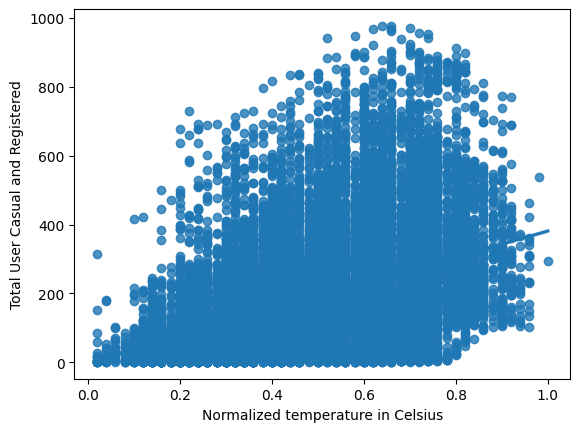

In [32]:
# Berdasarkan temperatur

sns.regplot(x=day_bike["temp"], y=day_bike["cnt"])
plt.xlabel("Normalized temperature in Celsius")
plt.ylabel("Total User Casual and Registered")
plt.show()

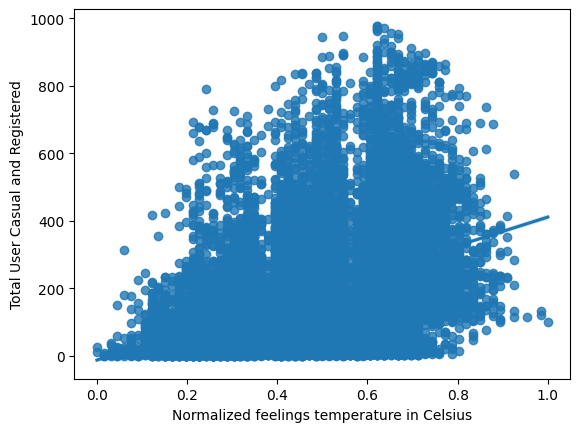

In [33]:
# Berdasarkan feelings temperature

sns.regplot(x=day_bike["atemp"], y=day_bike["cnt"])
plt.xlabel("Normalized feelings temperature in Celsius")
plt.ylabel("Total User Casual and Registered")
plt.show()

Berdasarkan grafik di atas, Terdapat dua faktor kondisi lingkungan yang menyebabkan signifikasi pengguna bike sharing, yaitu suhu udara dan kecepatan angin. suhu udara yang panas dan kecepatan angin yang cukup kencang membuat orang lain enggan menggunakan sepeda, penggunaan kendaraan beratap dan ber-AC lebih disukai. Pengguna lebih suka bersepeda di cuaca yang tidak terlalu panas dan angin yang tidak cukup kencang.

### 2. Bagaimana pengaruh cuaca terhadap penggunaan bike sharing?

In [34]:
byseason_bike = day_bike.groupby(by="weathersit").instant.nunique().reset_index()
byseason_bike.rename(columns={"instant": "sum"}, inplace=True)
byseason_bike

,weathersit,sum
0,Clear,11413
1,Heavy Rain,3
2,Light Snow,1419
3,Mist + Cloudy,4544


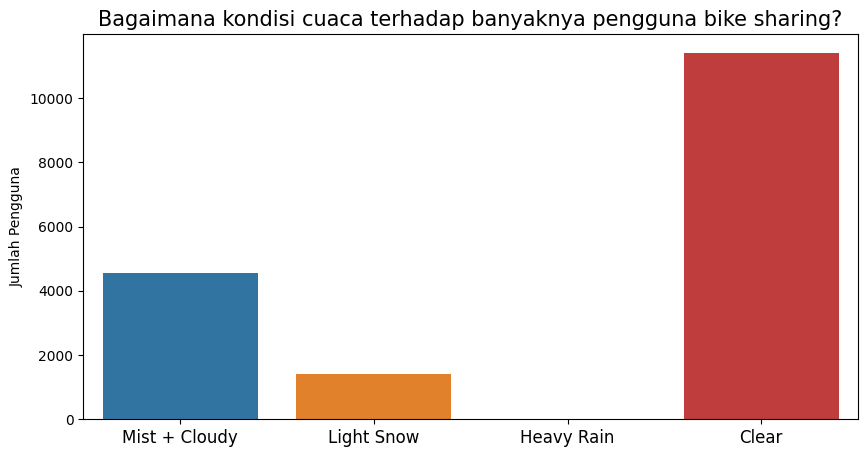

In [35]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="weathersit",
    data=byseason_bike.sort_values(by="weathersit", ascending=False),
)
plt.title("Bagaimana kondisi cuaca terhadap banyaknya pengguna bike sharing?", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

Berdasarkan diagram di atas, menjelaskan bahwa kondisi cuaca mempengaruhi banyaknya pengguna bike sharing. kondisi cerah atau "Clear" merupakan Kondisi cuaca dengan pengguna bike sharing terbanyak, kondisi ini sangat cocok untuk bersepeda dibandingkan dengan kondisi cuaca mendung, hujan deras, atau bersalju.

### 3. Bagai mana pengaruh hari kerja terhadap penggunaan bike sahring?

In [36]:
byworkingday_bike = day_bike.groupby(by="workingday").instant.nunique().reset_index()
byworkingday_bike.rename(columns={"instant": "sum"}, inplace=True)
byworkingday_bike

,workingday,sum
0,Holiday,5514
1,Working Day,11865


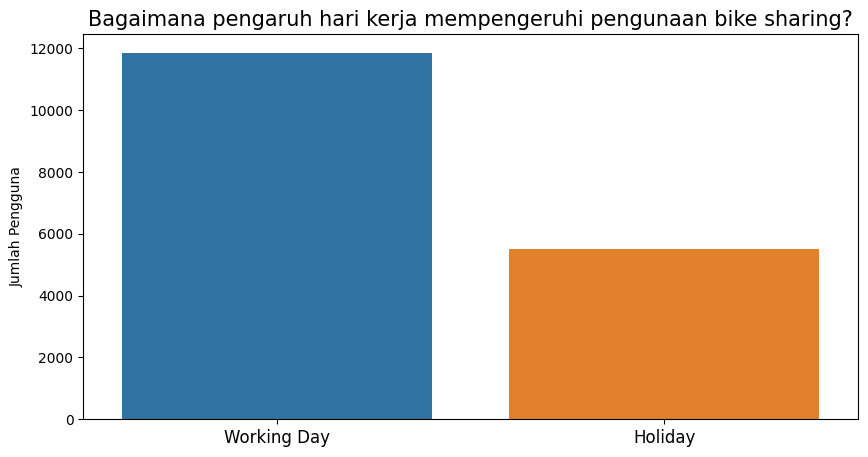

In [37]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="workingday",
    data=byworkingday_bike.sort_values(by="workingday", ascending=False),
)
plt.title("Bagaimana pengaruh hari kerja mempengeruhi pengunaan bike sharing?", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

Berdasarkan diagram di atas, menjelaskan bahawa jumlah penggunaan Bike Sharing lebih banyak pada hari kerja dibanding pada hari libur. Hal ini menandakan bahwa, bike sharing lebih banyak digunakan untuk moda transportasi untuk berangkat kerja dibandingkan digunakan untuk jalan-jalan di hari libur.

## Conclusion

Berdasarkan analisi yang telah dilakukan, dapat ditarik kesimpulan bahwa jumlah penggunaan bike sahring terbanyak yaitu pada saat cuaca cerah serta suhu udara dan kecepatan angin tidak terlalu tinggi. Selain itu penggunaan bike sahring juga lebih banyak digunakan pada hari kerja untuk moda transportasi berangkat kerja.

In [38]:
day_bike.to_csv("dashboard.csv", index=False)